In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# Check accuracy score 
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn import svm

# training the model on training set
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.model_selection import train_test_split
import re
import pickle

import matplotlib.pyplot as plt

In [67]:
import gc
gc.collect()

42

In [2]:
df = pd.read_csv('../../../data/clean_data/data_clean.csv')
df_scaled = pd.read_csv('../../../data/clean_data/data_scaled.csv')

In [11]:
# categorize each feature for encoding or scaling
cat_feats = ['artist_name', 'key', 'mode', 'music_genre']
cat_feats_ohe = ['artist_name', 'mode']
cat_feats_le = ['music_genre']

num_feats = ['popularity', 'acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
num_feats_scale = ['popularity', 'duration_ms_imp', 'loudness', 'tempo_imp']
num_feats_imp_mean = ['duration_ms']
num_feats_imp_median = ['tempo']

In [ ]:
music_genre = ['Alternative', 'Anime', 'Blues', 'Classical', 'Country', 'Electronic', 'Hip-Hop', 'Jazz', 'Rap', 'Rock']

In [14]:
feats = ['popularity', 'acousticness','danceability', 'duration_ms_imp', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo_imp', 'valence', 'mode_Major', 'mode_Minor']

In [67]:
df_scaled.shape

(40560, 15)

In [3]:
# get rid of unwanted values
df_scaled.columns = df_scaled.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [4]:
# identify target variable
df_target = df_scaled['music_genre']

In [5]:
# identify input variables
df_input = df_scaled.drop('music_genre', axis=1)

In [6]:
# make separate input for feature selection
df_input_selection = df_scaled.drop(['music_genre', 'liveness', 'key', 'energy', 'valence', 'duration_ms_imp', 'tempo_imp'], axis=1)

In [15]:
# make separate input for feature selection
df_input_selection = df_scaled[feats]

In [60]:
df_input_selection.head()

,popularity,acousticness,danceability,instrumentalness,loudness,speechiness,artist_name_!!!,"artist_name_""Weird Al"" Yankovic",artist_name_$NOT,artist_name_$tupid Young,...,artist_name_川田まみ,artist_name_彩音,artist_name_春音あいら(CV.阿澄佳奈),artist_name_棗坂シキ(CV.平川大輔),artist_name_楚神ウリエ(CV.近藤隆),artist_name_立華リツカ(CV.茜屋日海夏),artist_name_鉤貫レム(CV.斉藤壮馬),artist_name_黒崎真音,mode_Major,mode_Minor
0,-1.027184,0.00468,0.652,0.79200,0.651238,0.0748,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.764339,0.01270,0.622,0.95000,0.360987,0.0300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.961473,0.00306,0.620,0.01180,0.743261,0.0345,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.567206,0.02540,0.774,0.00253,0.762012,0.2390,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.698628,0.00465,0.638,0.90900,0.483422,0.0413,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df_input_selection.shape

(44696, 12)

In [30]:
#Check for missing data
def check_null(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False))*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [31]:
check_null(df_scaled)

,Total,Percent
popularity,0,0.0
artist_name_Layo & Bushwacka!,0,0.0
artist_name_Phoebe Snow,0,0.0
artist_name_Phoebe Bridgers,0,0.0
artist_name_Phish,0,0.0
...,...,...
artist_name_Gov't Mule,0,0.0
artist_name_Goth Babe,0,0.0
"artist_name_Gotay ""El Autentiko""",0,0.0
artist_name_Gotan Project,0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.3, random_state=1001)

In [8]:
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(df_input_selection, df_target, test_size=0.3, random_state=1001)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# define individual transformers in a pipeline
categorical_preprocessing = Pipeline([('ohe', OneHotEncoder())])
numerical_preprocessing = Pipeline([('imputation', SimpleImputer())])

# define which transformer applies to which columns
preprocess = ColumnTransformer([
    ('categorical_preprocessing', categorical_preprocessing, ['favorite_color']),
    ('numerical_preprocessing', numerical_preprocessing, ['age'])
])

# create the final pipeline with preprocessing steps and 
# the final classifier step
pipeline = Pipeline([
    ('preprocess', preprocess),
    ('clf', DecisionTreeClassifier())
])

# now fit the pipeline using the whole dataframe
df_features = df[['favorite_color','age']]
df_target = df['target']

# call fit on the dataframes
pipeline.fit(df_features, df_target)


In [ ]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'total_income', 'LoanAmount', 'Loan_Amount_Term']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)


categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


# This dataset is way too high-dimensional. Better do PCA:
pca = PCA()

# Maybe some of the original features were good, too?
selection = SelectKBest()

# Build an transformer from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# We will initialize the classifier
svm = SVC(kernel="linear")

# create our pipeline from FeatureUnion 
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# set up our parameters grid
param_grid = {"features__pca__n_components": [1, 2, 3],
                  "features__univ_select__k": [1, 2, 3],
                  "svm__C":[0.1, 1, 10]}

# create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, verbose=10, refit=True)    

# fit the model and tune parameters
grid_search.fit(X, y)




# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ('f_classif', SelectKBest(k=3)), ("classifier", RandomForestClassifier())]
)

X_train, X_test, y_train, y_test = train_test_split(df_clean2, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [ ]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    'f_classif__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "classifier__n_estimators": [1, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search

In [ ]:
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)

In [ ]:
pickle.dump(grid_search, open("model.p", "wb" ))

In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

In [ ]:
print(
    (
        "best random forest classifier from grid search: %.3f"
        % grid_search.score(X_test, y_test)
    )
)

# Decision Tree Modeling

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(class_weight = 'balanced')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(clf.feature_importances_)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average = None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))

[0.19676789 0.08354284 0.08999763 0.06682518 0.06596915 0.08522439
 0.05243515 0.12490761 0.1007359  0.06002843 0.07356581]
0.4341715976331361
Accuracy: 0.4341715976331361
Precision: [0.29194631 0.67009426 0.39924242 0.73254836 0.40216486 0.48044218
 0.29579832 0.38125    0.29752705 0.41587575]
Recall: [0.29367089 0.62710505 0.43953294 0.73876166 0.40216486 0.47359598
 0.28594639 0.39323127 0.30701754 0.38933764]


In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(class_weight = 'balanced')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(clf.feature_importances_)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average = None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))

[0.18716286 0.0691887  0.07491708 ... 0.         0.00465268 0.00585512]
Accuracy: 0.5404579014095011
Precision: [0.32904884 0.73213046 0.47935003 0.77694407 0.48181238 0.51269394
 0.70841751 0.40629096 0.46096402]
Recall: [0.34758995 0.70099668 0.46671061 0.78660221 0.49281984 0.48145695
 0.70985155 0.42465753 0.45816464]


# Random Forest Classifier Modeling

In [24]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

y_pred_prob = rfc.predict_proba(X_test)

print(rfc.feature_importances_)

# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average = None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))

[0.18421103 0.09071331 0.09418691 0.0716589  0.0861858  0.08599675
 0.05570252 0.09810923 0.0982844  0.06069467 0.0742565 ]
Model accuracy score with 10 decision-trees : 0.5528
Precision: [0.40019194 0.7978096  0.59094791 0.84037162 0.55904211 0.65727273
 0.36011905 0.53011026 0.34579439 0.48251748]
Recall: [0.35189873 0.75942261 0.57714762 0.84393554 0.56369692 0.60603521
 0.39317628 0.50362611 0.3245614  0.61308562]


In [11]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

y_pred_prob = rfc.predict_proba(X_test)

print(rfc.feature_importances_)

# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average = None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average = None))

[1.13895822e-01 5.91186501e-02 5.82245923e-02 ... 7.59480090e-05
 4.98677444e-03 5.59246569e-03]
Model accuracy score with 10 decision-trees : 0.6968
Precision: [0.51832907 0.8815261  0.68975265 0.85839514 0.67278481 0.73281361
 0.75822861 0.598      0.54042806]
Recall: [0.41276307 0.87508306 0.64337508 0.87914365 0.69386423 0.68476821
 0.85492578 0.61438356 0.61336032]


In [13]:
# print out feature importaces
print(rfc.feature_importances_[0:12])

[0.11389582 0.05911865 0.05822459 0.05470436 0.05707098 0.02583672
 0.03462315 0.06072535 0.05983345 0.04621305 0.04284767 0.03929976]


# XGBoost

In [48]:
data_dmatrix = xgb.DMatrix(data=df_input, label=df_target)

In [49]:
xg_reg = xgb.XGBRegressor(objective= 'multi:softmax', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 5, alpha = 0.5, n_estimators = 100, num_class = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

print(xg_reg.feature_importances_)

# Check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, preds, average = None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, preds, average = None))

[00:14:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.01035097 0.00378485 0.00308919 ... 0.         0.00389245 0.00236322]
Model accuracy score: 0.7196
Precision: [0.57052797 0.89451477 0.71731191 0.89099859 0.71438127 0.76082005
 0.78727386 0.59037711 0.58966565]
Recall: [0.49151392 0.84518272 0.64733026 0.875      0.69712794 0.66357616
 0.85155196 0.62191781 0.7854251 ]


In [38]:
# save the model to disk
filename = 'xgboost_baseline_model.sav'
pickle.dump(xg_reg, open(filename, 'wb'))
 
# some time later...
 

In [39]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)

# Check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)))


Model accuracy score: 0.7196


In [40]:
print(xg_reg.feature_importances_[0:11])

[0.01035097 0.00378485 0.00308919 0.00441411 0.00468215 0.0004395
 0.0004502  0.00482281 0.00348253 0.00198502 0.00166047]


In [9]:
data_dmatrix_select = xgb.DMatrix(data=df_input_selection, label=df_target)

In [10]:
xg_reg_select = xgb.XGBRegressor(objective= 'multi:softmax', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 5, alpha = 0.5, n_estimators = 100, num_class = 10)

xg_reg_select.fit(X_train_select,y_train_select)

preds = xg_reg_select.predict(X_test_select)

print(xg_reg_select.feature_importances_)

# Check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, preds)))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, preds, average = None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, preds, average = None))

[01:40:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.00785033 0.00368485 0.00267765 ... 0.         0.00281784 0.0028021 ]
Model accuracy score: 0.6989
Precision: [0.55815832 0.8888102  0.70606061 0.88912429 0.68667546 0.71331828
 0.7630273  0.55230669 0.57523434]
Recall: [0.46911066 0.83388704 0.61437047 0.86947514 0.67950392 0.62781457
 0.82995951 0.58219178 0.78677463]


In [58]:
print(xg_reg_select.feature_importances_[0:11])

[0.00970772 0.00471116 0.00304572 0.00239055 0.00455671 0.00430703
 0.00367696 0.00210738 0.00158593 0.00091581 0.0008283 ]


In [17]:
xgb.plot_importance(xg_reg_select, max_num_features = 10)
plt.rcParams['figure.figsize'] = [10, 10]

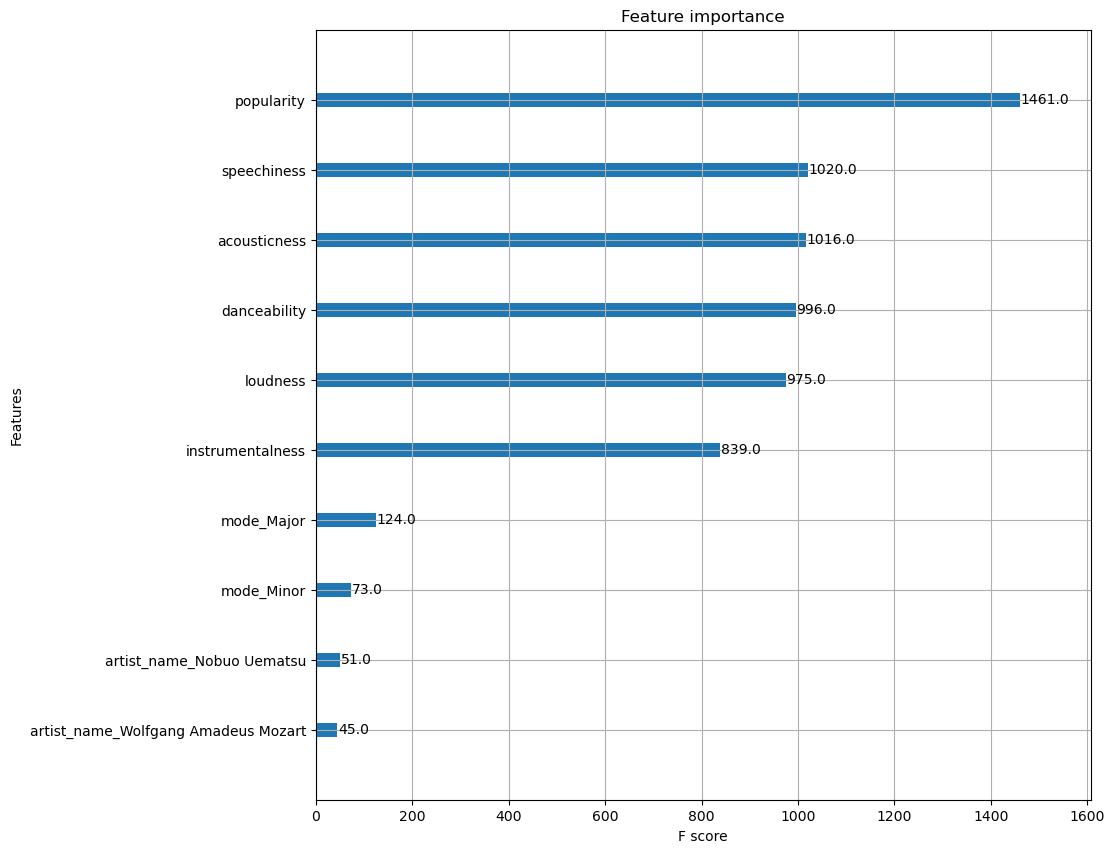

In [18]:
plt.show()

In [10]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [22]:
X_train_select.shape

(31287, 12)

In [23]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_select, y_train_select)

In [ ]:
rbf_pred = rbf.predict(X_test_select)

In [27]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  58.99
F1 (RBF Kernel):  58.82


In [43]:
poly = svm.SVC(kernel='poly', gamma=0.5, degree=3, C=0.15).fit(X_train_select, y_train_select)

In [41]:
poly_pred = poly.predict(X_test_select)

In [42]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  59.89
F1 (Polynomial Kernel):  60.16


In [28]:
sig = svm.SVC(kernel='sigmoid', gamma='scale', C=0.1).fit(X_train_select, y_train_select)

In [29]:
sig_pred = sig.predict(X_test_select)

In [30]:
sig_accuracy = accuracy_score(y_test, sig_pred)
sig_f1 = f1_score(y_test, sig_pred, average='weighted')
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (sig_accuracy*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (sig_f1*100))

Accuracy (Sigmoid Kernel):  31.11
F1 (Sigmoid Kernel):  30.74
